# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Monopoly game described in the Homework and for which you wrote a Markov chain model:

<img src="monopoly.png" width="300px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* The jail does not prevent the player from continuing to play. In other words, when landing on the “GO TO JAIL” cell, the player jumps back to the “JAIL” cell, but resumes play immediately.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import numpy.

**Note 2**: Make sure to print the result in the end.

---

In [4]:
import numpy as np

""" 
Board Postion, state translation:

Go = 0
Vermont Avenue = 1
Jail = 2
Virginia Avenue = 3
Free Parking = 4
Marvin Gardens = 5
Go to Jail = 6
Pennsylvania Avenue = 7

"""


# List with all states
X = [ 0, 1, 2, 3, 4, 5, 6, 7 ]

# Transition probability matrix                       states
P = np.array([[0.0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0.0], #0
			  [0.0, 0.0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6], #1
			  [1/6, 0.0, 0.0, 1/6, 1/6, 1/6, 1/6, 1/6], #2
			  [1/6, 1/6, 0.0, 0.0, 1/6, 1/6, 1/6, 1/6], #3
			  [1/6, 1/6, 1/6, 0.0, 0.0, 1/6, 1/6, 1/6], #4
			  [1/6, 1/6, 1/6, 1/6, 0.0, 0.0, 1/6, 1/6], #5
			  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], #6
			  [1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0.0, 0.0]]) #7


---

#### Activity 2.

Compute the probability of the following trajectories:

* "COLLECT \$200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
* "COLLECT \$200" - "GO TO JAIL" - "JAIL" - "COLLECT \$200"
* "COLLECT \$200" - "PENNSYLVANIA AVENUE" - "COLLECT \$200"

**Note:** Make sure to print the result in the end.

---

In [3]:
# Insert your code here

#intuition: 1 * 1/6 * 1/6 * 1 = 0.027777777777777776

t0 = np.array([1, 0, 0, 0, 0, 0, 0, 0])
t1 = np.array([0, 1, 0, 0, 0, 0, 0, 0])
t2 = np.array([0, 0, 0, 0, 0, 0, 1, 0])

res = np.dot(t0, P)[1]
res = np.dot(t1, P)[6] * res
res = np.dot(t2, P)[2] * res
print ("for the first trajectory: " + str(res))


t0 = np.array([1, 0, 0, 0, 0, 0, 0, 0])
t1 = np.array([0, 0, 0, 0, 0, 0, 1, 0])
t2 = np.array([0, 0, 1, 0, 0, 0, 0, 0])

# Intuition: 1 * 1/6 * 1 * 1/6 = 0.027777777777777776

res = np.dot(t0, P)[6]       # P(x1=6 | x0 = 0)
res = np.dot(t1, P)[2] * res # P(x2=2 | x1 = 6)
res = np.dot(t2, P)[0] * res # P(x3=0 | x2 = 2)
print ("for the second trajectory: " + str(res))

# Intuition: 1 * 0 * 1 = 0

t0 = np.array([1, 0, 0, 0, 0, 0, 0, 0])
t1 = np.array([0, 0, 0, 0, 0, 0, 0, 1])

res = np.dot(t0, P)[7]
res = np.dot(t1, P)[0] * res

print ("for the third trajectory: " + str(res))


NameError: name 'np' is not defined

### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

The chain is irreducible because we can reach any state, starting from every other state.
Starting in state 3(estado X) we can return here either by 3,4,7,3 (3 jumps) or 3,5,3 (2 jumps); This means the greatest common divider is 1. Knowing this and that the chain is irreducible we can conclude it is aperiodic.
Since the chain is irreducible and aperiodic, then it also is ergodic.

---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [2]:
# Insert your code here


eigenvec1 = np.linalg.eig(P)[1][0]
print(eigenvec1)

norm = np.linalg.norm(eigenvec1)

distribution = eigenvec1/norm




NameError: name 'np' is not defined

### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [24]:
import random

#the trajectory is a vector where the value on entry i represents tha state at time i.
#exemple: trajectory[4] = 2 means that at time 4 the agent is in jail.

trajectory = np.array([0])
i = 1
while (i < 10000):
    random_index = random.randint(0, 7)
    while (P[trajectory[i-1]][random_index] == 0.0):
        random_index = random.randint(0, 7)
        
    trajectory = np.append(trajectory, [random_index])
    i=i+1


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Compare the relative frequencies with the result of Activity #4.

---

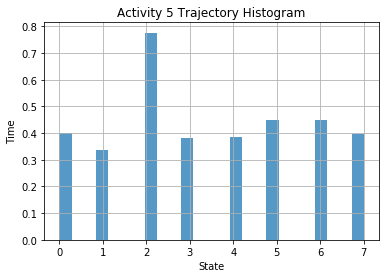

(0.409431806164+0j)
(0.151088018852+0.261265083187j)
(0.151088018852-0.261265083187j)
(-0.360429302132-0.37252135549j)
(-0.360429302132+0.37252135549j)
(0.285601972986+0j)
(-0.108208451751+0.0626179708174j)
(-0.108208451751-0.0626179708174j)


In [37]:
# Insert your code here
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(trajectory, 25, normed=1, alpha=0.75)
plt.xlabel("State")
plt.ylabel("Time")
plt.title("Activity 5 Trajectory Histogram")
plt.grid(True)

plt.show()



[Provide your answer here]